# The Sparks Foundation 

# EXPLORATORY DATA ANALYSIS- SPORTS

# Name:- Pratik Sonune

In [1]:
#filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing The Necessary Libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Reading The Dataset
match= pd.read_csv("matches.csv")
delivery= pd.read_csv("deliveries.csv")

In [5]:
match.head()  #Checking the first 5 rows of the dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
match.shape  #Checking the dimension of the dataset

(756, 18)

In [7]:
match.columns  #Checking the column names

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
match.info()  #Checking the column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
delivery.shape

(179078, 21)

In [11]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [12]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [13]:
delivery.describe(include='all')  #Summary Statistics

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [14]:
match.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [15]:
match.isnull().sum()  #Checking for the missing values if any

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [16]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Since most values are null in umpire 3 we will drop that column.

In [17]:
match=match.drop(['umpire3'],axis=1)

In [18]:
#We will treat the missing values of the categorical variables with the mode
match['city']=match['city'].fillna('Mumbai')
match['winner']=match['winner'].fillna('Mumbai Indians')
match['player_of_match']=match['player_of_match'].fillna('CH Gayle')
match['umpire1']=match['umpire1'].fillna('HDPK Dharmasena')
match['umpire2']=match['umpire2'].fillna('C Shamshuddin')
delivery['player_dismissed']=delivery['player_dismissed'].fillna("SK Raina")
delivery['dismissal_kind']=delivery['dismissal_kind'].fillna("caught")
delivery['fielder']=delivery['fielder'].fillna("MS Dhoni")

In [19]:
match.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [20]:
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [21]:
print(match['team1'].unique())
print(match['team2'].unique())
print(delivery['batting_team'].unique())
print(delivery['bowling_team'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
['Royal Challengers Bangalore' 'Sunrisers Hyd

Here, we see in all both team1, team2, batting_team and bowling_team Rising Pune Supergiants is appearing twice and we need to fix this.

In [22]:
match['team1']=np.where(match['team1']=="Rising Pune Supergiants","Rising Pune Supergiant",match['team1'])
match['team2']=np.where(match['team2']=="Rising Pune Supergiants","Rising Pune Supergiant",match['team2'])
delivery['batting_team']=np.where(delivery['batting_team']=="Rising Pune Supergiants","Rising Pune Supergiant",delivery['batting_team'])
delivery['bowling_team']=np.where(delivery['bowling_team']=="Rising Pune Supergiants","Rising Pune Supergiant",delivery['bowling_team'])

In [23]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

In [24]:
match['city']=np.where(match['city']=="Bengaluru","Bangalore",match['city'])

In [25]:
print('Total number of MATCHES PLAYED :',delivery['match_id'].nunique())
print('Total number of RUNS SCORED by the batsman :',delivery['total_runs'].sum())
print('Total number of WIDE RUNS :',delivery['wide_runs'].sum())
print('Total number of NO-BALL RUNS :',delivery['noball_runs'].sum())
print('Total number of BYE RUNS :',delivery['bye_runs'].sum())
print('Total number of LEG-BYE RUNS :',delivery['legbye_runs'].sum())
print('Total number of PENALTY RUNS :',delivery['penalty_runs'].sum())
print('Total number of BATSMAN RUNS :',delivery['batsman_runs'].sum())
print('Total number of SUPER OVERS :',delivery[delivery['is_super_over']==1].match_id.nunique())

Total number of MATCHES PLAYED : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


## EXPLORATORY DATA ANALYSIS

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

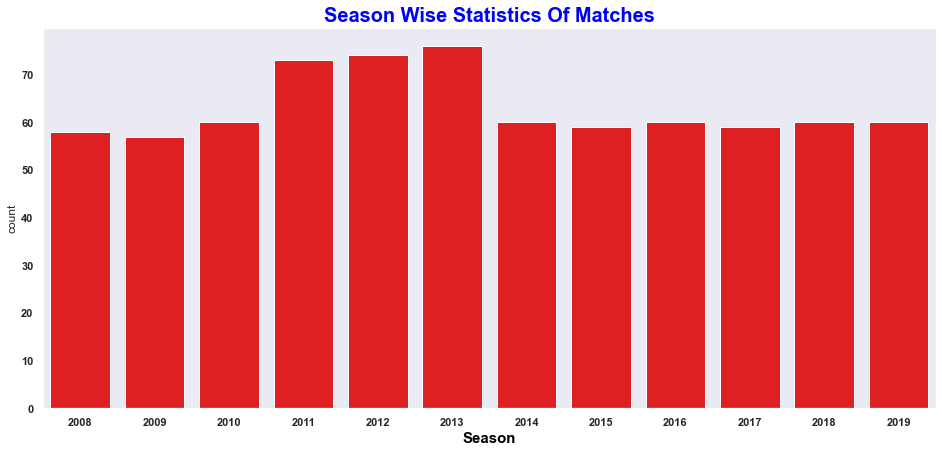

In [26]:
# Number Of Matches Played In Each Season
sns.set(style='dark')
plt.subplots(figsize=(16,7))
sns.countplot(match['season'],color='red')
plt.xlabel("Season",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.title("Season Wise Statistics Of Matches",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

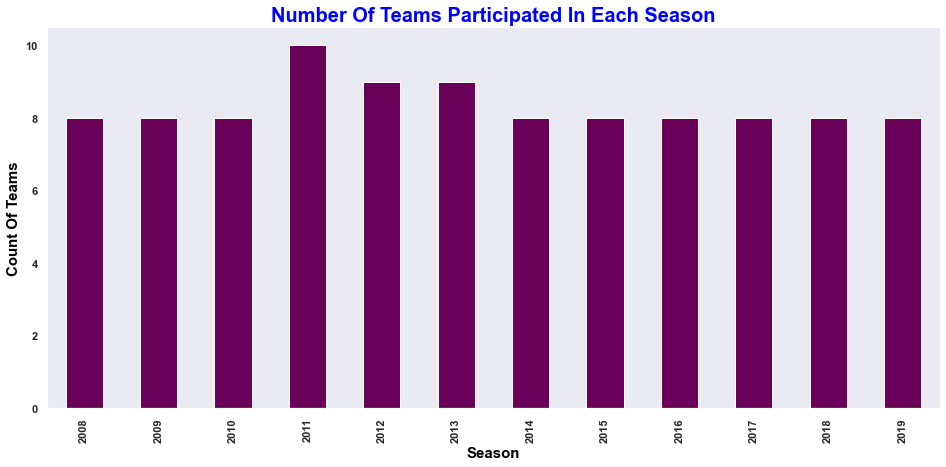

In [27]:
# How many teams played in each season?
sns.set(style='dark')
match.groupby(['season'])['team1'].nunique().plot.bar(figsize=(16,7),color='#690059')
plt.xlabel("Season",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.ylabel("Count Of Teams",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.title("Number Of Teams Participated In Each Season",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Dr DY Patil Sports Academy'),
  Text(0, 1, 'Maharashtra Cricket Association Stadium'),
  Text(0, 2, 'Punjab Cricket Association Stadium, Mohali'),
  Text(0, 3, 'Sawai Mansingh Stadium'),
  Text(0, 4, 'MA Chidambaram Stadium, Chepauk'),
  Text(0, 5, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(0, 6, 'Feroz Shah Kotla'),
  Text(0, 7, 'Wankhede Stadium'),
  Text(0, 8, 'M Chinnaswamy Stadium'),
  Text(0, 9, 'Eden Gardens')])

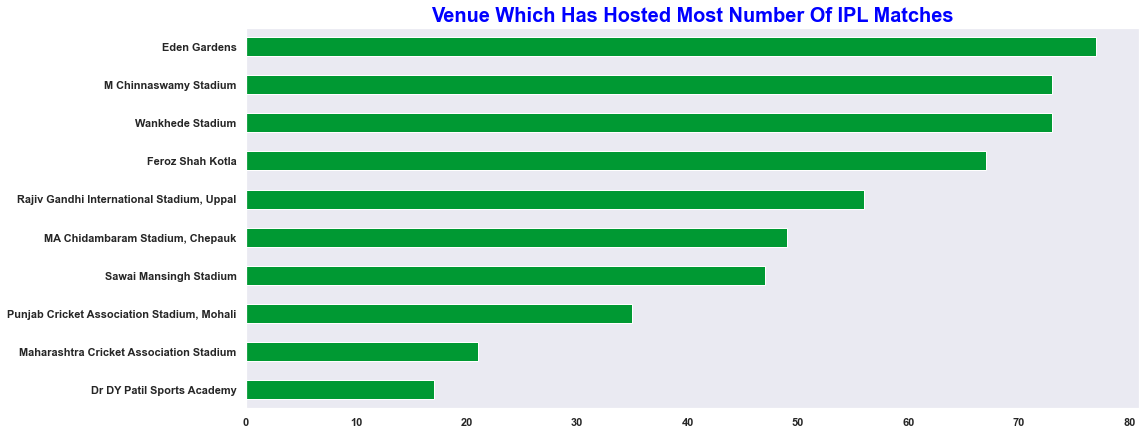

In [28]:
#Venue which has hosted most number of IPL matches
sns.set(style='dark')
match['venue'].value_counts().sort_values().tail(10).plot.barh(figsize=(16,7),color='#009933')
plt.title("Venue Which Has Hosted Most Number Of IPL Matches",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

<AxesSubplot:ylabel='toss_decision'>

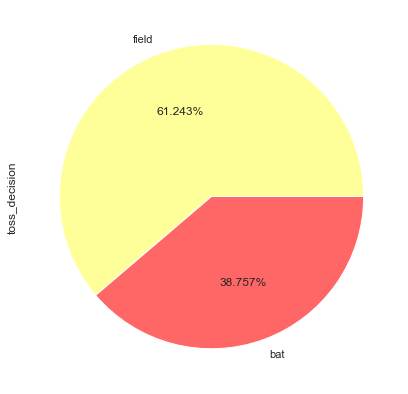

In [29]:
#Does teams choosed to bat or field first, after winning toss?
sns.set(style='dark')
match['toss_decision'].value_counts().plot.pie(figsize=(16,7),colors=['#ffff99','#ff6666'],autopct='%2.3f%%')

In [30]:
# Which team has maximum wins in IPL so far
#creating a dataframe with season and winner columns
winning_teams = match[['season','winner']]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(0, 1, 'Deccan Chargers'),
  Text(0, 2, 'Sunrisers Hyderabad'),
  Text(0, 3, 'Kolkata Knight Riders'),
  Text(0, 4, 'Chennai Super Kings'),
  Text(0, 5, 'Mumbai Indians')])

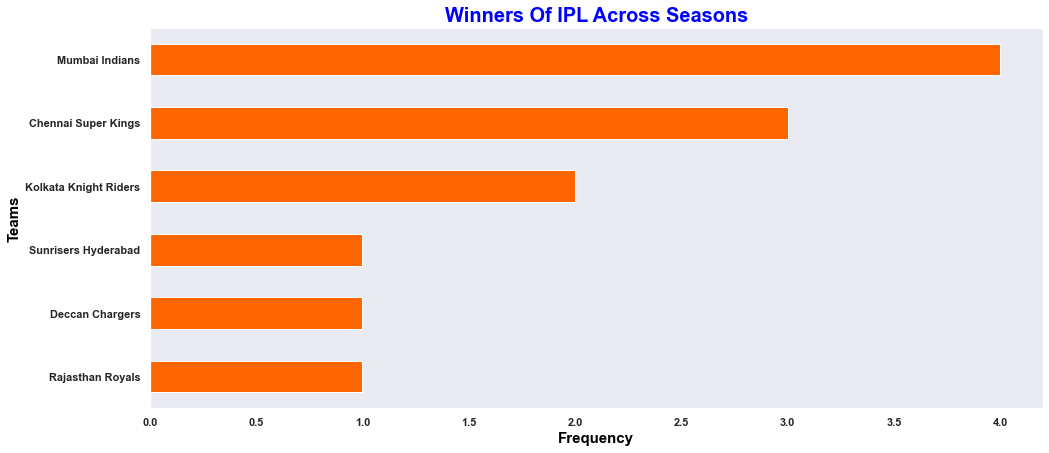

In [31]:
#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])
winners_of_IPL['team'].value_counts().sort_values().plot.barh(figsize = (16,7), color = '#FF6600')
plt.title("Winners Of IPL Across Seasons",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.ylabel("Teams",fontdict={'color':"black","fontsize":15,'fontweight':'bold'} )
plt.xlabel("Frequency",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

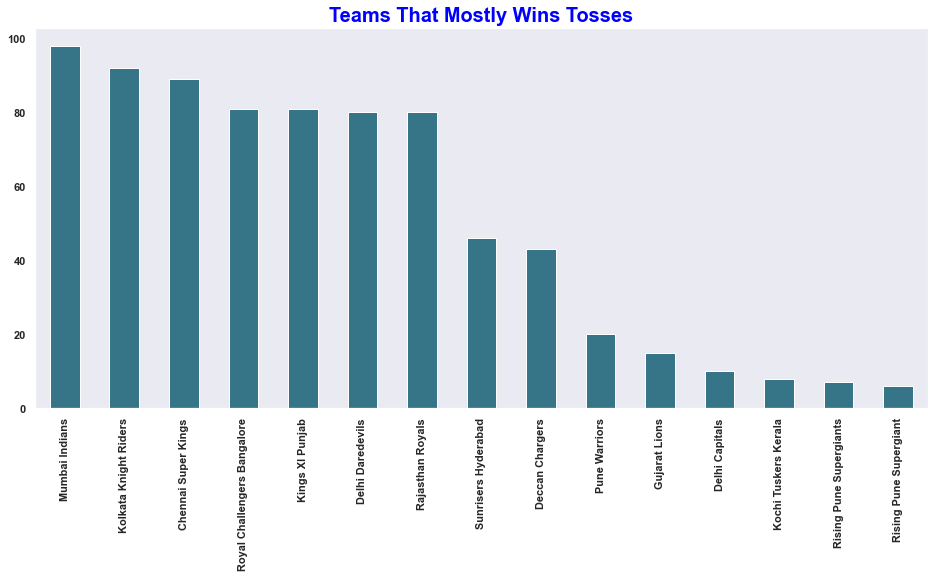

In [32]:
#Most toss won by
sns.set(style='dark')
match['toss_winner'].value_counts().plot.bar(figsize=(16,7),color='#367588')
plt.title("Teams That Mostly Wins Tosses",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

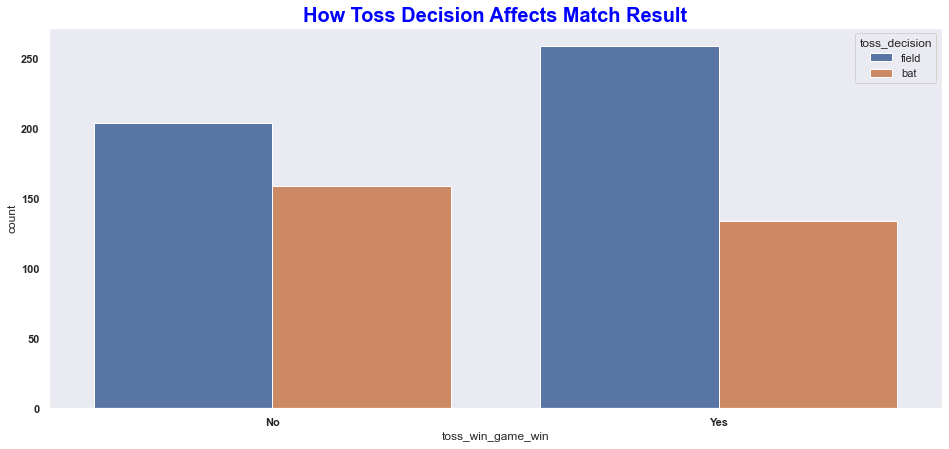

In [79]:
#How toss decision affects match results
match['toss_win_game_win']=np.where((match['toss_winner']==match['winner']),"Yes","No")
sns.set(style='dark')
plt.subplots(figsize=(16,7))
sns.countplot('toss_win_game_win',data=match,hue='toss_decision')
plt.title("How Toss Decision Affects Match Result",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

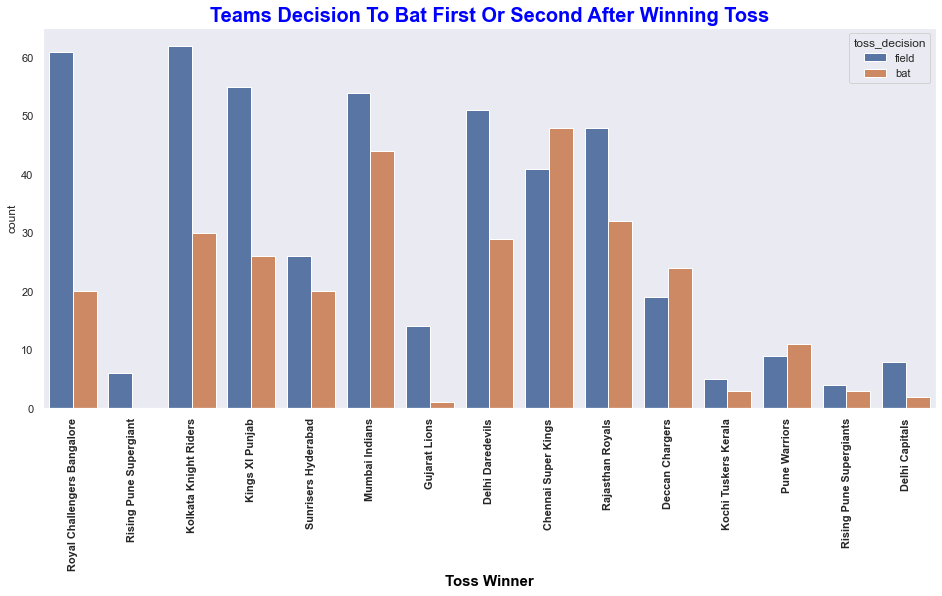

In [82]:
sns.set(style='dark')
plt.subplots(figsize=(16,7))
sns.countplot('toss_winner',data=match,hue='toss_decision')
plt.title("Teams Decision To Bat First Or Second After Winning Toss",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xlabel("Toss Winner",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold",rotation=90)

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

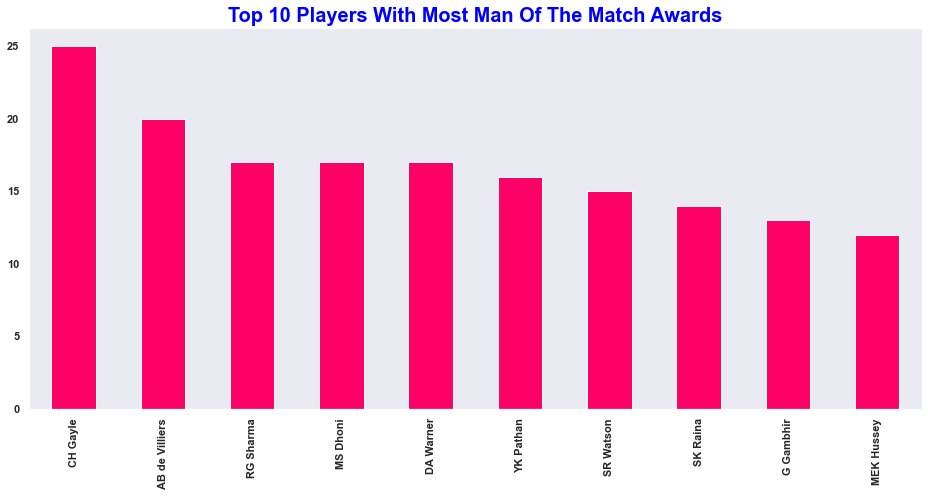

In [85]:
# Which player's performance has mostly led team's win?
sns.set(style='dark')
match['player_of_match'].value_counts().head(10).plot.bar(figsize=(16,7),color='#ff0066')
plt.title("Top 10 Players With Most Man Of The Match Awards",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

In [34]:
data = pd.merge(delivery,match, left_on='match_id', right_on ='id')

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

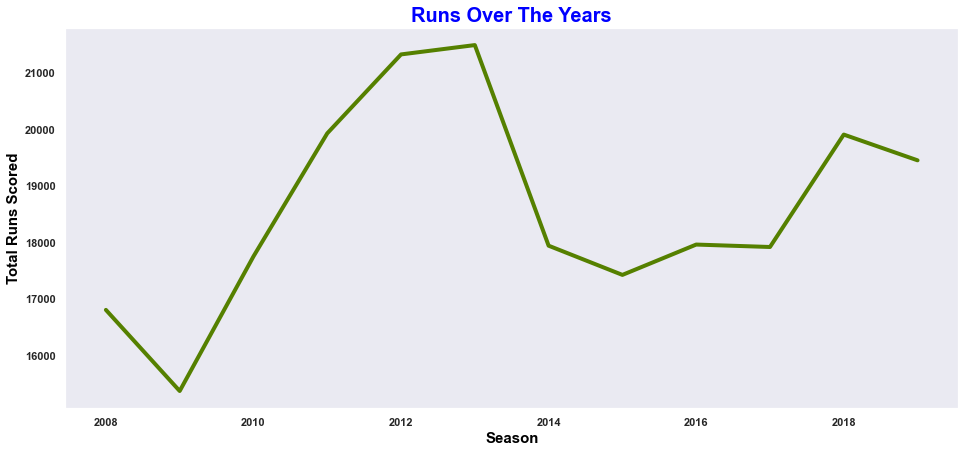

In [35]:
sns.set(style='dark')
data.groupby(['season'])['batsman_runs'].sum().plot(figsize=(16,7),color='#558000',linewidth=4)
plt.title("Runs Over The Years",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.ylabel("Total Runs Scored",fontdict={'color':"black","fontsize":15,'fontweight':'bold'} )
plt.xlabel("Season",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

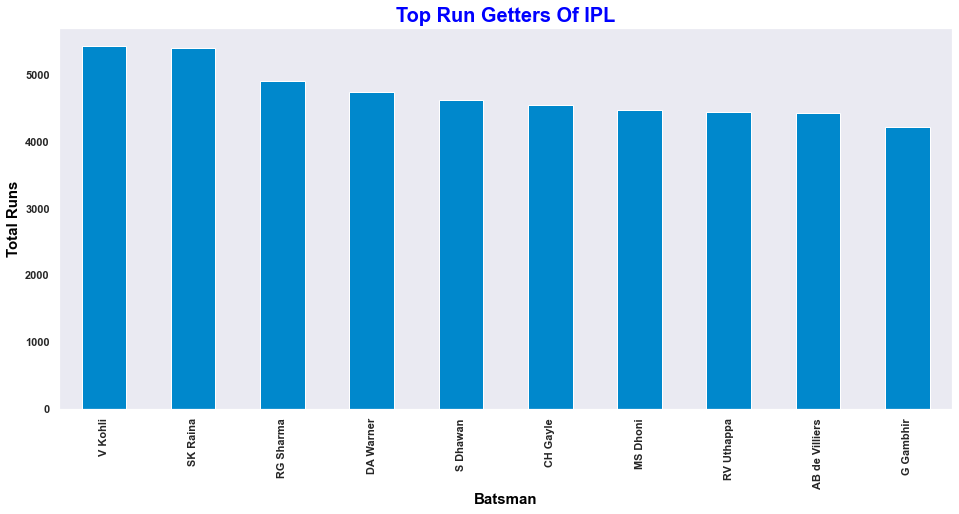

In [93]:
#Let's plot the top 10 run getter so far in IPL
sns.set(style='dark')
delivery.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(figsize=(16,7),color='#0088cc')
plt.title("Top Run Getters Of IPL",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.ylabel("Total Runs",fontdict={'color':"black","fontsize":15,'fontweight':'bold'} )
plt.xlabel("Batsman",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'ACA-VDCA Stadium'),
  Text(0, 1, 'Barabati Stadium'),
  Text(0, 2, 'Brabourne Stadium'),
  Text(0, 3, 'Buffalo Park'),
  Text(0, 4, 'De Beers Diamond Oval'),
  Text(0, 5, 'Dr DY Patil Sports Academy'),
  Text(0, 6, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(0, 7, 'Dubai International Cricket Stadium'),
  Text(0, 8, 'Eden Gardens'),
  Text(0, 9, 'Feroz Shah Kotla'),
  Text(0, 10, 'Feroz Shah Kotla Ground'),
  Text(0, 11, 'Green Park'),
  Text(0, 12, 'Himachal Pradesh Cricket Association Stadium'),
  Text(0, 13, 'Holkar Cricket Stadium'),
  Text(0, 14, 'IS Bindra Stadium'),
  Text(0, 15, 'JSCA International Stadium Complex'),
  Text(0, 16, 'Kingsmead'),
  Text(0, 17, 'M Chinnaswamy Stadium'),
  Text(0, 18, 'M. A. Chidambaram Stadium'),
  Text(0, 19, 'M. Chinnaswamy St

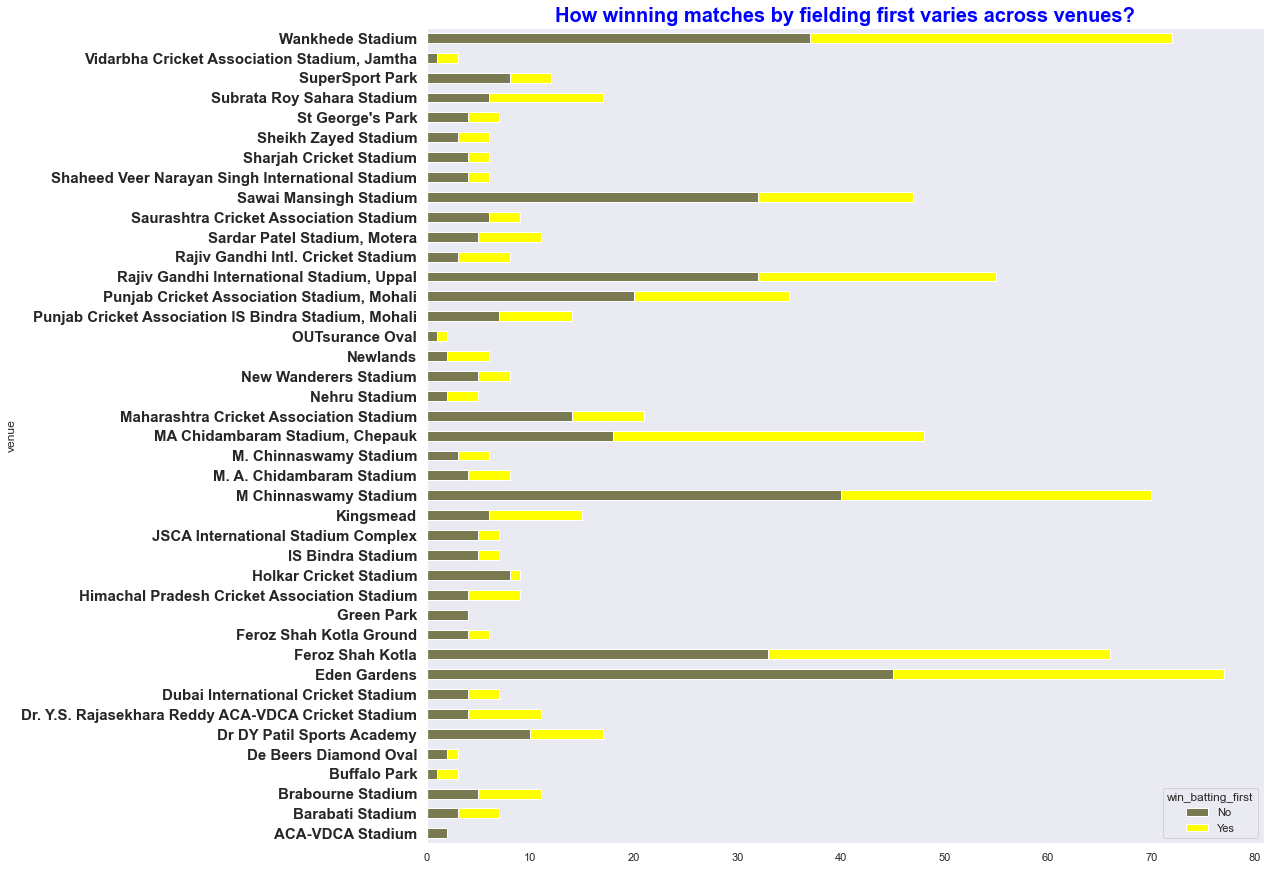

In [95]:
# How winning matches by fielding first varies across venues?
new_match = match[match['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_match['win_batting_first'] = np.where((new_match['win_by_runs'] > 0), 'Yes', 'No')
new_match.groupby('venue')['win_batting_first'].value_counts().unstack().plot.barh(stacked = True,figsize=(15,15),color=['#7a7a52','#ffff00'])
plt.title("How winning matches by fielding first varies across venues?",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.yticks(fontweight="bold",size=15)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

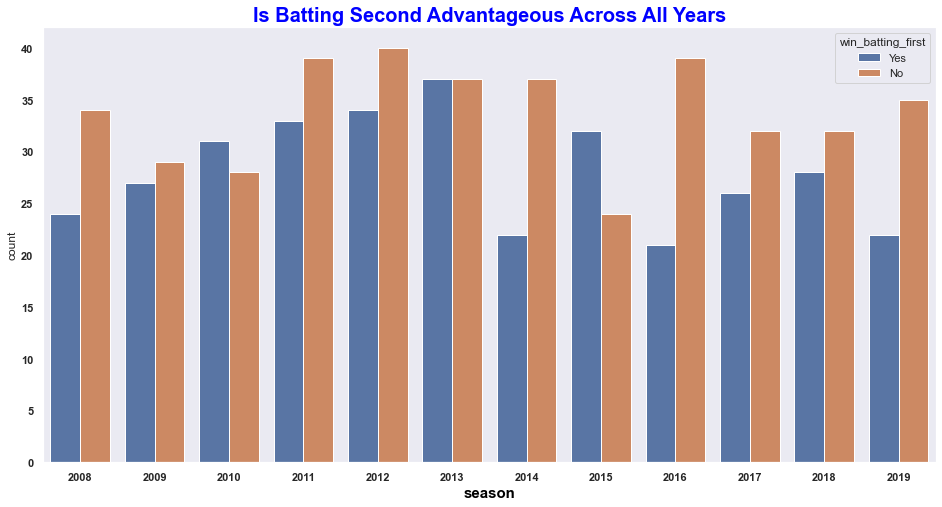

In [98]:
# Is batting second advantageous across all years
plt.subplots(figsize = (16,8))
sns.countplot('season', data = new_match, hue = 'win_batting_first')
plt.title("Is Batting Second Advantageous Across All Years",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.xlabel("season",fontweight="bold",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.yticks(fontweight="bold")

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

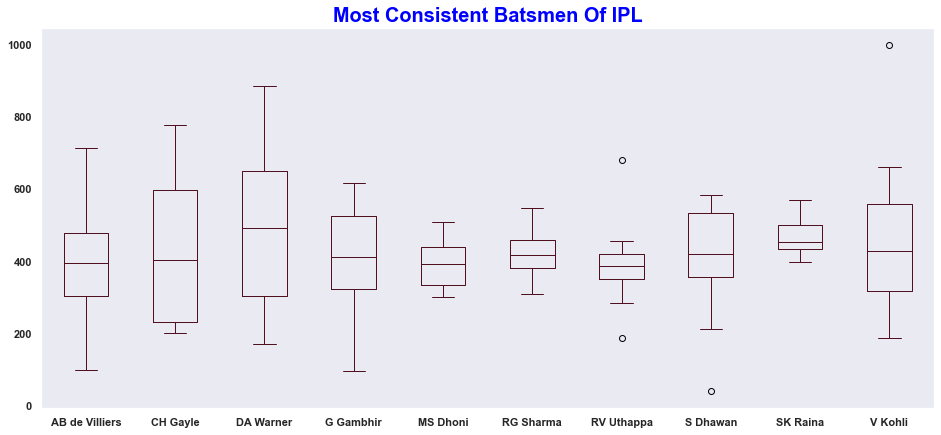

In [37]:
#Which batsman has been most consistent among top 10 run getters?

consistent_batsman = data[data['batsman'].isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]
consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot.box(figsize = (16,7),color="#51101F")
plt.title("Most Consistent Batsmen Of IPL",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

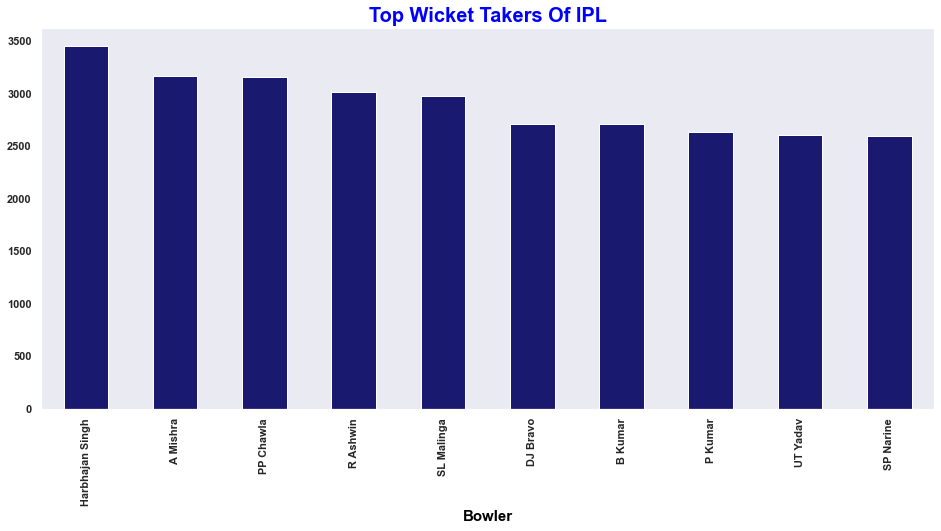

In [38]:
#Which bowlers have performed the best
sns.set(style='dark')
delivery.groupby(['bowler'])['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(16,7),color='#191970')
plt.title("Top Wicket Takers Of IPL",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xlabel("Bowler",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

In [39]:
# Batsmen with the best strike rates over the years
# We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(delivery.groupby(['batsman'])['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(delivery.groupby(['batsman'])['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(data.groupby(['batsman'])['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate['season'].isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

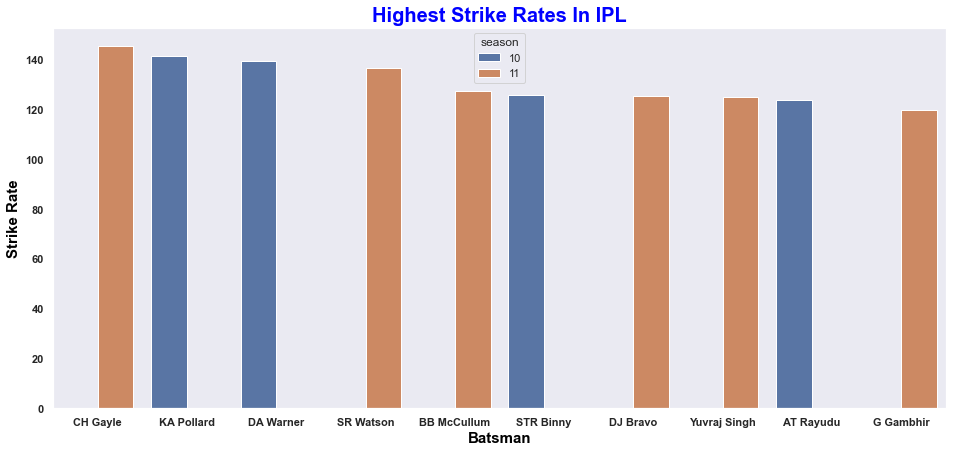

In [42]:
sns.set(style='dark')
plt.subplots(figsize = (16,7))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest Strike Rates In IPL",fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xlabel("Batsman",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.ylabel("Strike Rate",fontdict={'color':"black","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

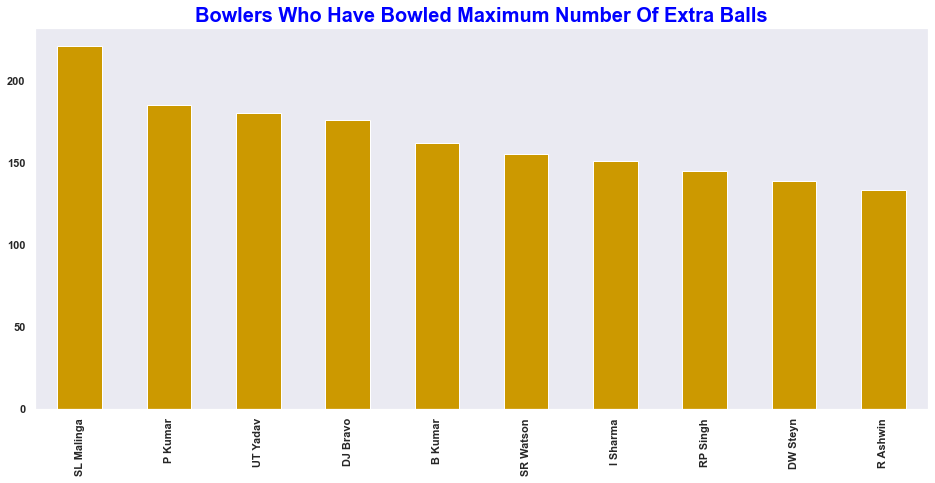

In [43]:
#Bowlers with maximum number of extras
sns.set(style='dark')
delivery[delivery['extra_runs']!=0]['bowler'].value_counts().head(10).plot.bar(figsize=(16,7),color='#cc9900')
plt.title('Bowlers Who Have Bowled Maximum Number Of Extra Balls',fontdict={'color':"blue","fontsize":20,'fontweight':'bold'})
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")